## Rishi Raj                             22M0033

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\MOHIT PRAJAPAT\Desktop\me793 self\element_data.csv')

In [4]:
df.head()

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,youngs_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,47,10.30,2485.0,0.147217,254.1,284.9,4.09,0.237,107.868200,1.60,1.630000e-08,10.27,100.0,83.0,1.086667,10490.0,0.000019
1,13,10.00,2740.0,0.150078,284.1,330.9,4.05,0.900,26.981539,1.25,2.700000e-08,10.00,76.0,70.0,0.675000,2700.0,0.000023
2,79,10.20,3080.0,0.261370,340.0,368.2,4.08,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,78.0,1.070000,19300.0,0.000014
3,29,7.10,2840.0,0.151172,304.6,337.4,3.61,0.385,63.546000,1.35,1.720000e-08,7.11,140.0,130.0,0.820000,8920.0,0.000017
4,77,8.54,4403.0,0.251060,604.0,669.0,3.84,0.133,192.217000,1.35,4.700000e-08,8.52,320.0,528.0,0.765000,22650.0,0.000006


In [5]:
df_Youngs=df['youngs_modulus'].sort_values()

In [6]:
subgroups = np.array_split(df_Youngs,7) # splits the elements into 7 subgroups

In [7]:
# taking out 1,3,5,7 subgroups therby supressing 2,4 and 6th subgroups corresponding to 1,3,5 in python.
new_subgroups=pd.concat([subgroups[0],subgroups[2],subgroups[4],subgroups[6]]) 

In [8]:
new_subgroups.head()

16     4.9
39     8.0
19    10.0
12    13.0
6     16.0
Name: youngs_modulus, dtype: float64

In [9]:
import random

In [10]:
shuffled_data=new_subgroups.sample(frac=1, random_state=random.seed()).to_frame() # shuffling the data set and converting 
#it into dataframe

In [11]:
shuffled_data.head()

,youngs_modulus
32,65.0
22,128.0
16,4.9
38,116.0
35,463.0


## Kmeans clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [13]:
n = 4 # number of clusters
k_means = KMeans(n_clusters=n)
k_means.fit(shuffled_data)
cluster_labels = k_means.predict(shuffled_data) # labeling the cluster based on kmeans
shuffled_data['cluster'] = cluster_labels 
unique_labels=np.unique(cluster_labels) #taking unique values of labels

In [14]:
centroids = k_means.cluster_centers_ # getting centroid of the clusters
labels= k_means.labels_

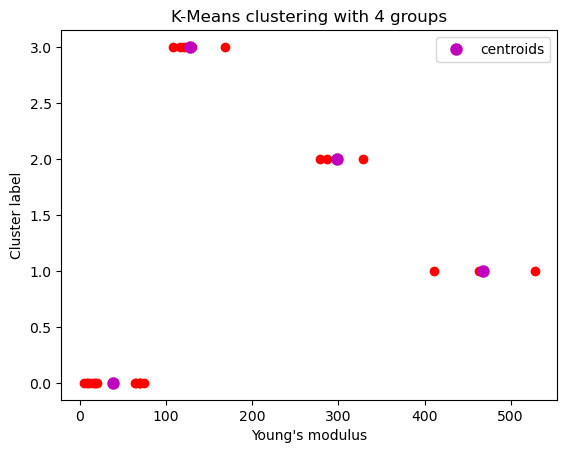

In [15]:
# the following codeblocks plots clusters along with the centroid value
plt.scatter(shuffled_data['youngs_modulus'],y=shuffled_data['cluster'],color='red')
plt.xlabel("Young's modulus")
plt.ylabel("Cluster label")
plt.title("K-Means clustering with 4 groups")
plt.plot(centroids[:,0],unique_labels,'mo',markersize=8, label='centroids')
plt.legend(loc='best')
plt.show()

## Elbow plot

C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


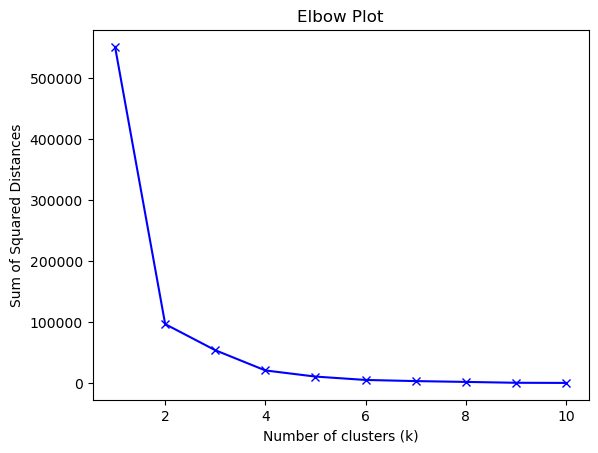

In [16]:
# following block does elbow plot for optimum number of clusters
Sum_sq_dist=[]
K= range(1,11)

for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(shuffled_data)
    Sum_sq_dist.append(kmeans_model.inertia_)
#Plotting The Elbow

plt.plot(K,Sum_sq_dist,'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot')
plt.show()

# 2.

In [17]:
import cv2

In [36]:
# following block of code reads micrograph image from the computer
img1 = cv2.imread('micrograph1.tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('micrograph2.tif', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('micrograph4.tif', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('micrograph5.tif', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('micrograph6.tif', cv2.IMREAD_GRAYSCALE)
img6 = cv2.imread('micrograph67.tif', cv2.IMREAD_GRAYSCALE)


In [37]:
# vertically stacking the data 
data2 = np.vstack([img1.ravel(), img2.ravel(),img3.ravel(),img4.ravel(), img5.ravel(),img6.ravel()]).T

#### Standardizing

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
data2_std = scaler.fit_transform(data2)

### elbow method to determine the optimal number of clusters

In [40]:
Sum_sq_dist=[]
K= range(1,11)

for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(data2_std)
    Sum_sq_dist.append(kmeans_model.inertia_)
    


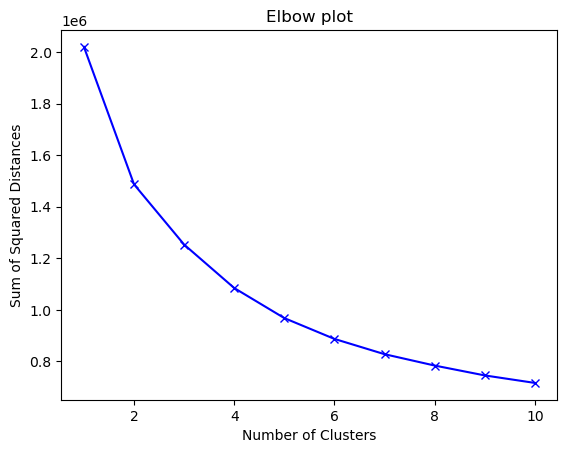

In [41]:
plt.plot(range(1, 11), Sum_sq_dist, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow plot')
plt.show()

Since there are lots of data points per column it is useful to minimize the dimension of data and then apply kmeans clustering 

### Reducing dimensionality using PCA

In [42]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Standardize the features
sc = StandardScaler()
X = sc.fit_transform(data2)

# Create a PCA object
pca = PCA(n_components=6)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)



Explained variance ratio: [0.39129358 0.15214239 0.13642549 0.12732044 0.10245661 0.09036149]


## From above it is clear that 5 is the appropriate choice of dimension for kmeans clustering

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data2_pca = pca.fit_transform(data2_std)

## Again finding out k-value from elbow plot on dimensionally reduced data

In [44]:
Sum_sq_dist_new=[]
K= range(1,11)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(data2_pca)
    Sum_sq_dist_new.append(kmeans_model.inertia_)
    

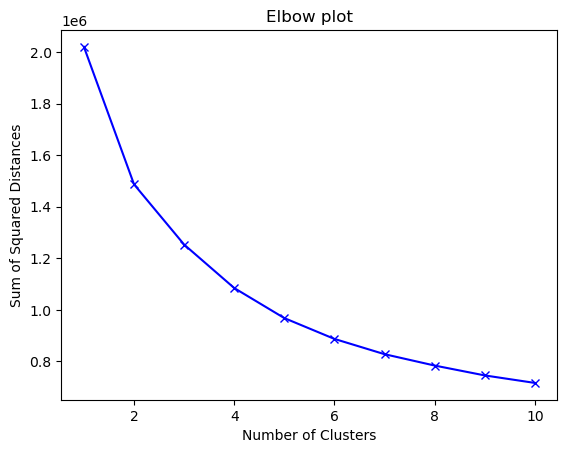

In [45]:
plt.plot(range(1, 11), Sum_sq_dist, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow plot')
plt.show()

## We can see that there is no sharp turn or elbow observed. From the figure, we can take k=4  reasonably.

### Applying k-means clustering

In [46]:
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(data2_pca)

### Plot the clusters in PC space

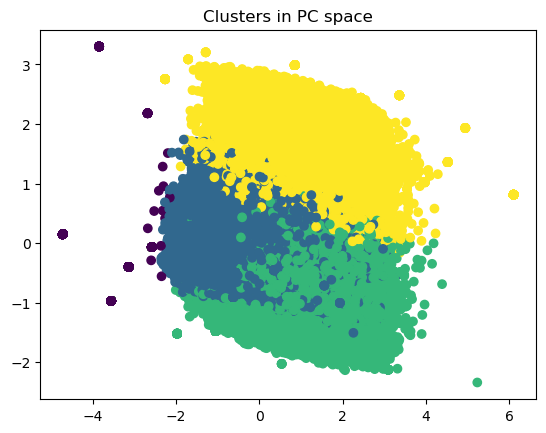

In [47]:
plt.scatter(data2_pca[:, 0], data2_pca[:, 1], c=labels)
plt.title('Clusters in PC space')
plt.show()

##  We can observe that there are 3 clusters predominantly for the selected images.